<a href="https://colab.research.google.com/github/kylemarzan/Math-200/blob/main/Python_Notebook_Setup_by_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Research Question # 2 : Is there an association between feeling confident to handle your own problems and how many cigarettes you smoke per day?

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
url='https://drive.google.com/file/d/1IbHzUMYKFBkmW3TIvryP7XJlW-WkmGEw/view?usp=sharing'
path= 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
df.head()

,AID,BIO_SEX,agew1,IMONTH4,IDAY4,IYEAR4,MACNO4,INTID4,BIO_SEX4,VERSION4,...,H4EO5C,H4EO5D,H4EO5E,H4EO5F,H4EO5G,H4EO5H,H4EO5I,H4EO5J,H4EO6,H4EO7
0,5710027,2,,,,,,,,,...,,,,,,,,,,
1,5710131,2,19.42739726,5,6,2008,2288160,160,2,V5.4,...,0,0,0,0,0,0,0,0,2,1
2,5710317,1,,,,,,,,,...,,,,,,,,,,
3,5710386,1,20.43013699,5,22,2008,2288238,238,1,V5.4,...,0,0,0,0,0,0,0,0,4,1
4,5710455,2,,,,,,,,,...,,,,,,,,,,


Codebook 1 H4MH4 PROBLEM_CONFIDENCE
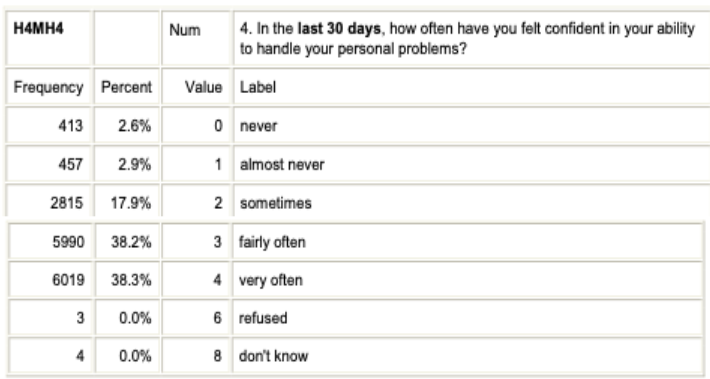

In [ ]:
#Manage data for variable 1

In [42]:
df['H4MH4'].value_counts()

4    1980
3    1954
     1390
2     880
1     164
0     133
6       2
8       1
Name: H4MH4, dtype: int64

In [43]:
df['PROBLEM_CONFIDENCE'] = df['H4MH4']
df['PROBLEM_CONFIDENCE'].value_counts()

4    1980
3    1954
     1390
2     880
1     164
0     133
6       2
8       1
Name: PROBLEM_CONFIDENCE, dtype: int64

In [44]:
df['PROBLEM_CONFIDENCE'] = df['PROBLEM_CONFIDENCE'].loc[ df['PROBLEM_CONFIDENCE'] !=' ' ] 
df['PROBLEM_CONFIDENCE'].value_counts()


4    1980
3    1954
2     880
1     164
0     133
6       2
8       1
Name: PROBLEM_CONFIDENCE, dtype: int64

In [45]:
df['PROBLEM_CONFIDENCE'] = df['PROBLEM_CONFIDENCE'].loc[ df['PROBLEM_CONFIDENCE'] !='6']
df['PROBLEM_CONFIDENCE'] = df['PROBLEM_CONFIDENCE'].loc[ df['PROBLEM_CONFIDENCE'] !='8']
df['PROBLEM_CONFIDENCE'].value_counts()

4    1980
3    1954
2     880
1     164
0     133
Name: PROBLEM_CONFIDENCE, dtype: int64

In [46]:
df['PROBLEM_CONFIDENCE'].replace(['0','1','2','3','4'], ['NEVER','ALMOST NEVER','SOMETIMES','FAIRLY OFTEN','VERY OFTEN'] , inplace = True)
df['PROBLEM_CONFIDENCE'].value_counts()

VERY OFTEN      1980
FAIRLY OFTEN    1954
SOMETIMES        880
ALMOST NEVER     164
NEVER            133
Name: PROBLEM_CONFIDENCE, dtype: int64

In [47]:
pip install ResearchPy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
import researchpy as rp

In [49]:
rp.summary_cat(df['PROBLEM_CONFIDENCE'])

,Variable,Outcome,Count,Percent
0,PROBLEM_CONFIDENCE,VERY OFTEN,1980,38.74
1,,FAIRLY OFTEN,1954,38.23
2,,SOMETIMES,880,17.22
3,,ALMOST NEVER,164,3.21
4,,NEVER,133,2.60


In [23]:
#Graphs and tables or statistics

<Axes: title={'center': 'How often do you felt confident in your ability to handle you personal problems'}, ylabel='PROBLEM_CONFIDENCE'>

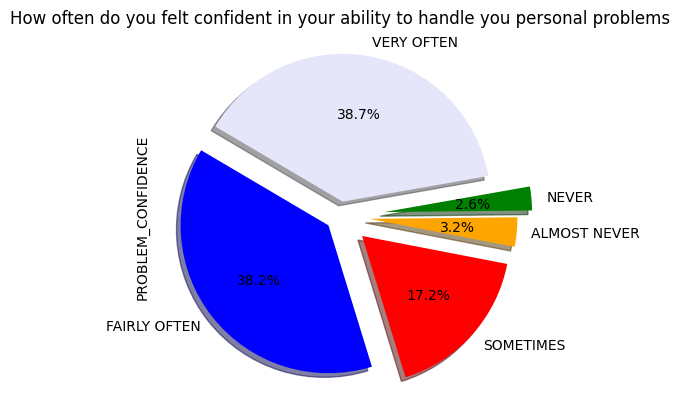

In [50]:
plt.title("How often do you felt confident in your ability to handle you personal problems")
explode = (0.1, 0.1, 0.2, 0.2, 0.3)
df['PROBLEM_CONFIDENCE'].value_counts().plot(kind ='pie', autopct='%1.1f%%', explode=explode, shadow=True, startangle=10, colors=['lavender', 'blue', 'red','orange','green'])

<Axes: title={'center': 'How often do you felt confident in your ability to handle you personal problems'}>

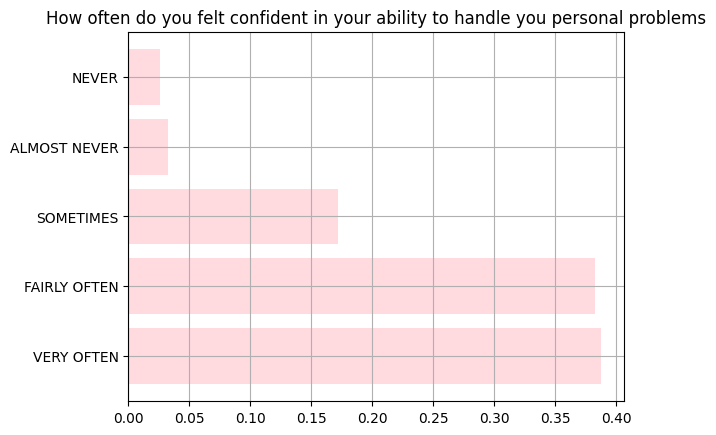

In [51]:
plt.xlabel("PROBLEM_CONFIDENCE")
plt.title("How often do you felt confident in your ability to handle you personal problems")
df['PROBLEM_CONFIDENCE'].value_counts(normalize = True).plot(kind ='barh', color = 'lightpink', width = 0.8, alpha = 0.5, grid = True)

Codebook 2: H4TO6 CIGS_SMOKE

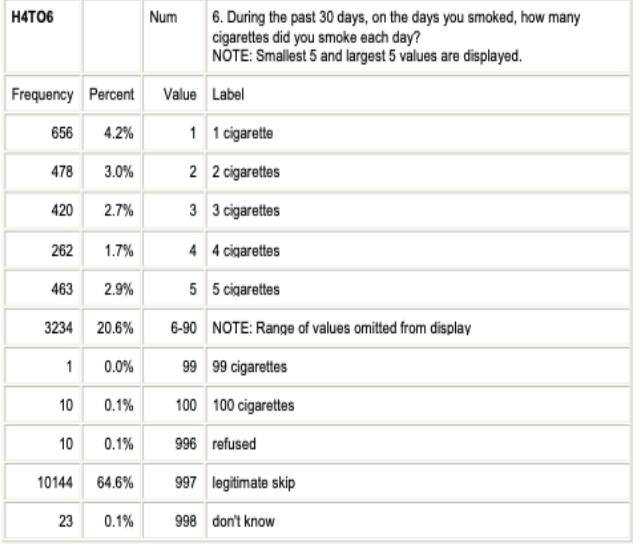

In [ ]:
#Manage data for variable 1

In [52]:
df['H4TO6'].dtype

dtype('O')

In [54]:
df['CIGS_SMOKE'] = df['H4TO6']
df['H4TO6'].dtype

dtype('O')

In [55]:
df['CIGS_SMOKE'] = pd.to_numeric(df['CIGS_SMOKE'] , errors = 'coerce' ) 
df['CIGS_SMOKE'].dtype

dtype('float64')

In [56]:
df['CIGS_SMOKE'] = df['CIGS_SMOKE'].loc[df['CIGS_SMOKE'] < 996]
df['CIGS_SMOKE'].max()

100.0

In [59]:
df['CIGS_SMOKE'].mean()

10.517054683270167

In [60]:
pip install ResearchPy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [61]:
import researchpy as rp

In [62]:
rp.summary_cont(df['CIGS_SMOKE'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,CIGS_SMOKE,1847.0,10.5171,9.304,0.2165,10.0925,10.9416


In [63]:
rp.summarize(df['CIGS_SMOKE'])

,Name,N,Mean,Median,Variance,SD,SE,95% Conf. Interval
0,CIGS_SMOKE,1847,10.5171,10.0,86.5651,9.304,0.2165,"[10.0925, 10.9416]"


In [64]:
df['CIGS_SMOKE'].describe()

count    1847.000000
mean       10.517055
std         9.304038
min         1.000000
25%         3.000000
50%        10.000000
75%        15.000000
max       100.000000
Name: CIGS_SMOKE, dtype: float64

In [ ]:
#Graphs and tables or statistics

In [65]:
import seaborn as sns

<Axes: xlabel='CIGS_SMOKE', ylabel='Count'>

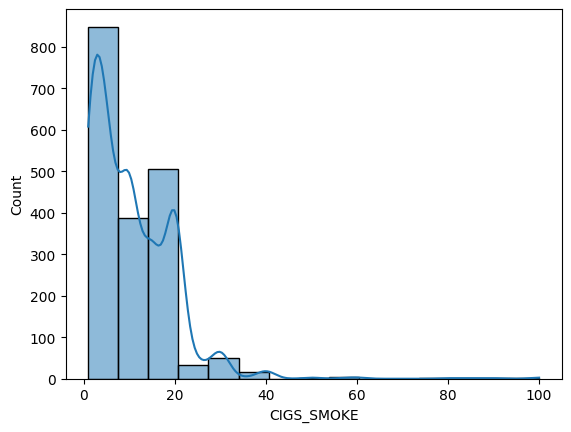

In [66]:
sns.histplot( x = 'CIGS_SMOKE', data = df, bins = 15, kde = True)

<Axes: xlabel='CIGS_SMOKE'>

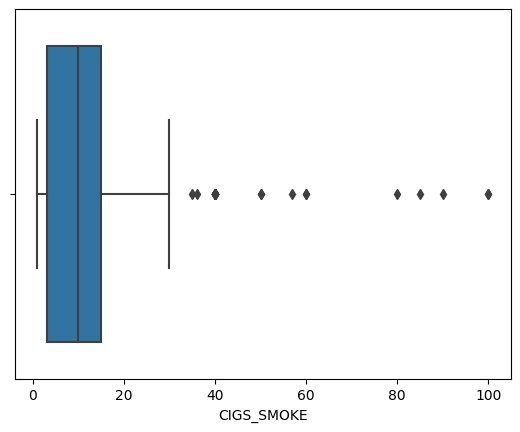

In [67]:
sns.boxplot( x = 'CIGS_SMOKE', data = df)